<a href="https://colab.research.google.com/github/rafflds/IMDB-PT-BR/blob/main/IMDB_PT_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import nltk
import seaborn as sns

In [2]:
resenha = pd.read_csv('/content/drive/MyDrive/imdb-reviews-pt-br.csv')
resenha.head(7)

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
5,6,"A funny thing happened to me while watching ""M...",Uma coisa engraçada aconteceu comigo enquanto ...,neg
6,7,This German horror film has to be one of the w...,Este filme de terror alemão tem que ser um dos...,neg


Quantidade de registros dentro da variável. Ambos os registro são semelhante, facilitando o aprendizado da máquina

In [4]:
resenha.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

Separando somente os registros com avaliação positivas

In [5]:
resenha.query('sentiment == "pos"')

,id,text_en,text_pt,sentiment
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


Verificar um texto com críticas positivas. Visualizar as palavras mais usadas nesse tipo de crítica.

In [6]:
print('Crítica Positiva: \n')
print(resenha.text_pt[49456])

Crítica Positiva: 

Estou espantado com a forma como este filme e a maioria dos outros tem uma média de 5 estrelas e menor quando há filmes de baixa qualidade com média de 7 a 10 estrelas no IMDb. A mentalidade de fanboy ataca novamente. Quando este filme saiu quase todo mundo bateu. Até minha ex-namorada disse esse filme questionável. Anos depois, sentei-me para assistir a esse filme e me vi aproveitando. Mesmo rindo um pouco. Este e os assassinos de substituição são os filmes que tinham pessoas rotulando o diretor Antoine Fuqua como o negro Michael Bay. Eu não vejo como a maioria dos filmes de Fuquas são mais inteligentes do que qualquer coisa que Michael Bay tenha inventado. De qualquer forma ... História: Alvin SandersJamie Foxx é o ex-presidiário que é usado por um no-nonsense agente do Tesouro EdgarDavid Morse como um peão para pegar um assassino chamado BristolDoug Hutchinson. Alvins todos os movimentos são rastreados por um bug implantado em sua mandíbula após um acidente. Enqu

Separando somente os registros com avaliação negativa

In [7]:
resenha.query('sentiment == "neg"')

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
37113,37115,"Towards the end of the movie, I felt it was to...","No final do filme, senti que era muito técnico...",neg
37114,37116,This is the kind of movie that my enemies cont...,Este é o tipo de filme que meus inimigos me as...,neg
37115,37117,I saw Descent last night at the Stockholm Film...,Eu vi Descent na noite passada no Stockholm Fi...,neg
37116,37118,Some films that you pick up for a pound turn o...,Alguns filmes que você escolhe por um quilo sã...,neg


Verificar um texto com críticas negativas. Visualizar as palavras mais usadas nesse tipo de crítica.

In [8]:
print('Crítica Negativa: \n')
print(resenha.text_pt[37117])

Crítica Negativa: 

Este é um dos filmes mais idiotas que já vi. Ele rasga quase sempre tipo de thriller e consegue fazer uma bagunça de todos eles. Não há uma única linha boa ou personagem em toda a bagunça. Se houve um enredo, foi uma reflexão tardia e, no que diz respeito à atuação, não há nada de bom para dizer, então não vou dizer nada. Eu sinceramente não consigo entender como esse tipo de bobagem é produzido e realmente liberado, alguém em algum lugar não em algum momento pensa: “Oh meu Deus, isso realmente é uma carga de merda e chamo isso de um dia. Sua porcaria como essa que tem pessoas baixando ilegalmente, o trailer parece um filme completamente diferente, pelo menos se você tiver baixado, você não perdeu seu tempo ou dinheiro Não perca seu tempo, isso é doloroso.


Transforma os dados da variável sentiment, em dados númericos, criar uma variável p/ salva-la dentro do dataset

In [9]:
classificar = resenha['sentiment'].replace(['neg','pos'], [0,1])
resenha['classificar'] = classificar
resenha.head()

,id,text_en,text_pt,sentiment,classificar
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [10]:
resenha.tail()

,id,text_en,text_pt,sentiment,classificar
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


## CountVectorizer¶

In [12]:
# max_features=50 quantidade máxima de features geradas
# lowercase=False permitir letras maiúsculas
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 50)


## LogisticRegression / TrainTestSplit

In [16]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              resenha.classificar,
                                                              random_state=42)

lg = LogisticRegression()
lg.fit(treino, classe_treino)
acuracia = lg.score(teste, classe_teste)
print(acuracia)

0.6583097452486858


**Criando uma função:**

* Treine o modelo
* Mostre a quantidade de acertos de palavras pelo modelo

In [17]:
def classificar_texto(texto, coluna_texto, coluna_classificar):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificar],
                                                              random_state=42)
    
    lg = LogisticRegression()
    lg.fit(treino, classe_treino)
    return lg.score(teste, classe_teste)
print(classificar_texto(resenha, 'text_pt', 'classificar'))

0.6583097452486858


## WordCloud

In [18]:
%matplotlib inline
from wordcloud import WordCloud

# Pegando todo o texto da variável, ''.join - separador de palavras
todas_palavras = ''.join([texto for texto in resenha.text_pt])

nuvem_palavras = WordCloud(width=800, height=500,
                          max_font_size=110).generate(todas_palavras)

Quantidade de palavras

In [19]:
len(todas_palavras)

63398966

## Matplotlib

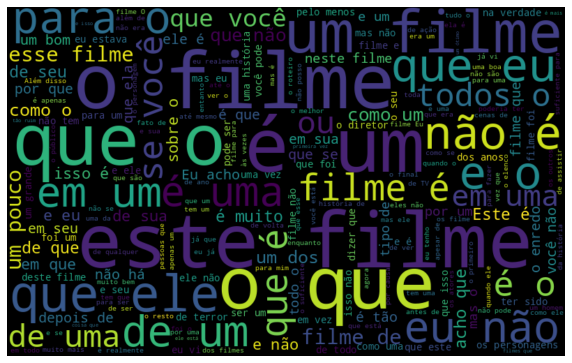

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')  # numero em volta do mapa
plt.show()

Criar funções, modificar os parâmetros

In [21]:
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query('sentiment == "pos"')
    todas_palavras = ''.join([texto for texto in texto_positivo[coluna_texto]])

    nuvem_palavras = WordCloud(width=800, height=500,
                              max_font_size=110).generate(todas_palavras)
    
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')  # numero em volta do mapa
    plt.show()

Mostrar somente as críticas positivas

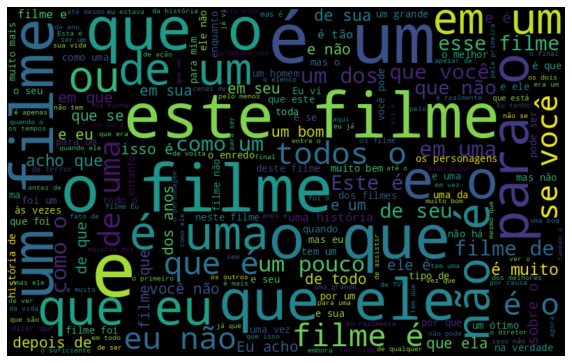

In [22]:
nuvem_palavras_pos(resenha, 'text_pt')

Criar funções, modificar os parâmetros

In [23]:
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query('sentiment == "neg"')
    todas_palavras = ''.join([texto for texto in texto_negativo[coluna_texto]])

    nuvem_palavras = WordCloud(width=800, height=500,
                              max_font_size=110).generate(todas_palavras)
    
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')  # numero em volta do mapa
    plt.show()

Críticas negativas

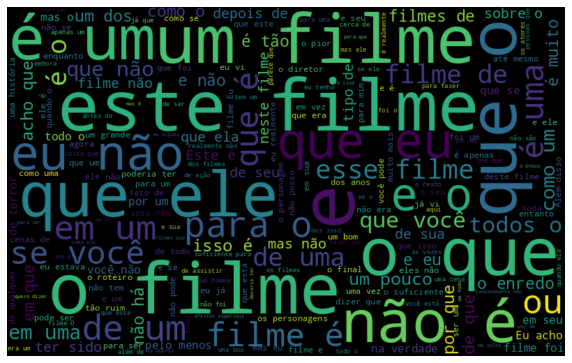

In [24]:
nuvem_palavras_neg(resenha, 'text_pt')

## Biblioteca NLTK

> Visualizando a quantidade de vezes que a mesma palavra repetiu-se

In [26]:
frase = ['um filme bom', 'um filme ruim']
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

Testando o tokenize com um texto aleatório

In [27]:
from nltk import tokenize

frase = 'Bem vindo ao mundo do PLN'

# espaços em branco
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN']


Usando a biblioteca no dataset

In [28]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

df_freq = pd.DataFrame({'Palavra': list(frequencia.keys()),
                       'Frequência': list(frequencia.values())})

10 palavras com maiores frequência

In [29]:
frequencia_10 = df_freq.nlargest(columns = 'Frequência', n = 10)
frequencia_10

,Palavra,Frequência
20,de,417383
14,que,325058
42,e,299720
3,o,244836
7,um,216380
102,a,210154
45,é,192359
199,em,132770
1,uma,130883
29,não,127894


## Seaborn

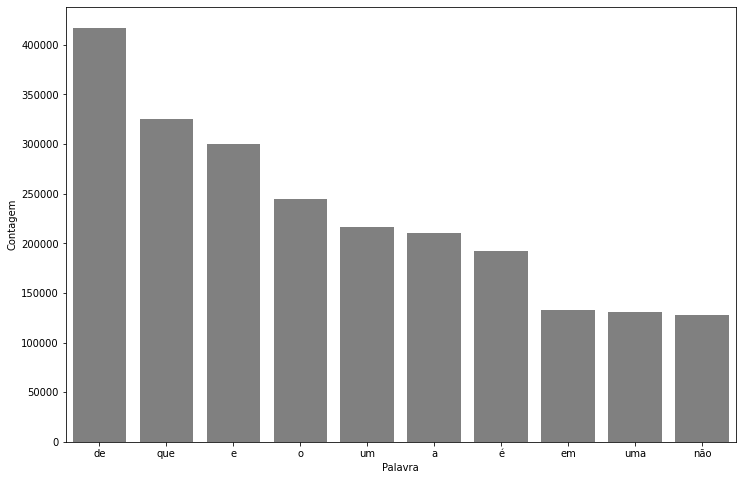

In [31]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data = frequencia_10, x = 'Palavra', y = 'Frequência', color='gray')
ax.set(ylabel = 'Contagem')
plt.show()

Criar uma função com todos os parâmetros

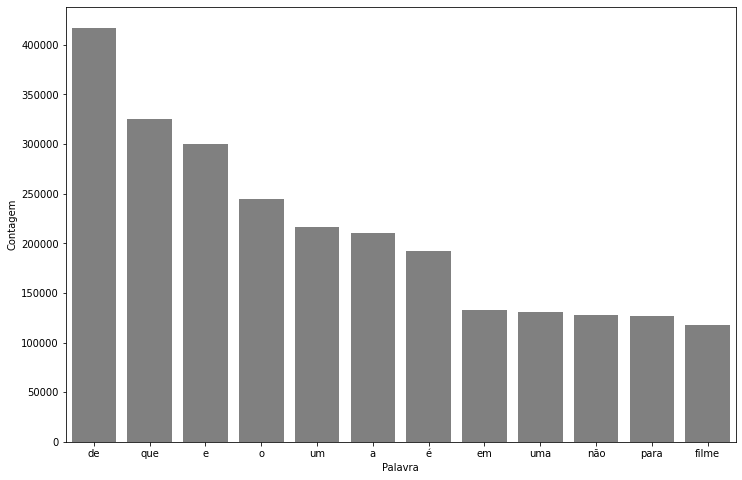

In [32]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ''.join([texto for texto in texto[coluna_texto]]) 
    token_espaco = tokenize.WhitespaceTokenizer()
    token_frase = token_espaco.tokenize(todas_palavras)    
    frequencia = nltk.FreqDist(token_frase)
    
    # DataFrame criação
    df_freq = pd.DataFrame({'Palavra': list(frequencia.keys()),
                       'Frequência': list(frequencia.values())})
    
    # Quantidade de colunas e ordem
    total_freq = df_freq.nlargest(columns = 'Frequência', n = quantidade)
    
    # Gráfico
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = total_freq, x = 'Palavra', y = 'Frequência', color='gray')
    ax.set(ylabel = 'Contagem')
    plt.show()
    
pareto(resenha, 'text_pt', 12)

## Stop Words - removendo o que não agrega

>Visualizando as palavras irrelevantes no texto

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
print(palavras_irrelevantes)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [36]:
resenha.head(2)

,id,text_en,text_pt,sentiment,classificar
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0


**Palavras de devem ficar em evidências:**
Filme bom, filme ruim, filme mediano, filme pessímo...
Separar no texto as palavras que não estejam no stop words

In [37]:
frase_processada = list()

for opiniao in resenha.text_pt:
    nova_frase = list()  # armazenar frase
    palavras_texto = token_espaco.tokenize(opiniao)
    
    # add as palavras que não estão salvo no stop words (palavras relevantes)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    
    # saldo a nova lista ('', '','')
    frase_processada.append(' '.join(nova_frase))

# Criando uma variável no dataset
resenha['tratamento_1'] = frase_processada

In [38]:
resenha.head()

,id,text_en,text_pt,sentiment,classificar,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


Chamando a função criada no começo da exploração dos dados

In [39]:
classificar_texto(resenha, 'tratamento_1', 'classificar')

0.6811160533764659

Visualizar as 10 palavras com maiores repetições

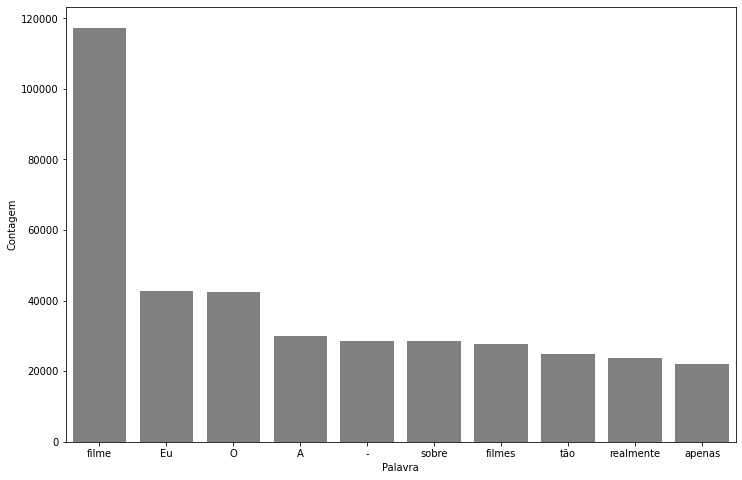

In [40]:
pareto(resenha, 'tratamento_1', 10)